In [289]:

import glob
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import hvplot.pandas
import csv
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import max_error
from sklearn import metrics
from sklearn.metrics import r2_score
from sklearn.metrics import explained_variance_score
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split



        Y       X
0  5.1627  2.0243
1  4.3093  1.5470
2  3.7513  1.3042
3  3.1206  1.2382
4  2.7733  1.1511
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 692 entries, 0 to 691
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Y       692 non-null    float64
 1   X       692 non-null    float64
dtypes: float64(2)
memory usage: 10.9 KB


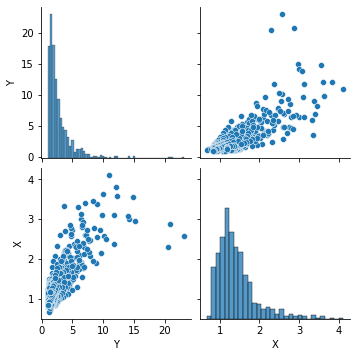

In [290]:
## reading data - information
data = pd.read_csv('merged_data.txt', sep=" ", header=None)
data.columns = ["Y", "X"]
data
data.to_csv ('data.csv', index=None)
print(data.head())
data.info()
sns.pairplot(data)

In [291]:
features =  data[['X']]
lables =  data[['Y']]
X = features # Independent variable
y = lables # Dependent variable

In [292]:

y.shape


(692, 1)

In [293]:
X.shape

(692, 1)

r2_score_test: 0.6249804344992638
r2_score_train: 0.5419741427254932


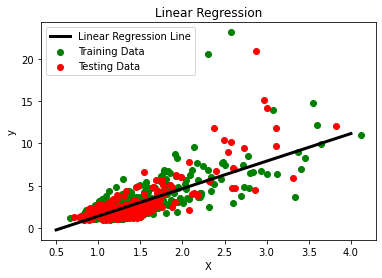

In [294]:
## linear regression
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
## we define the model
model_LIN = LinearRegression()
model_LIN.fit(X_train, y_train)
#####################################
## model can predict any lable by giving the new input
X_new = np.linspace(0.5, 4, 692).reshape(-1, 1)  # New input value
y_pred = model_LIN.predict(X_new)
#####################################@
y_pred_test = model_LIN.predict(X_test)
y_pred_train = model_LIN.predict(X_train)
print('r2_score_test:',r2_score(y_test, y_pred_test))
print('r2_score_train:',r2_score(y_train, y_pred_train))

####plots
plt.scatter(X_train, y_train, color='green', label='Training Data')
plt.plot(X_new, model_LIN.predict(X_new), color='black', label='Linear Regression Line', linewidth=3)
plt.scatter(X_test, y_test, color='red', label='Testing Data')
plt.xlabel('X')
plt.ylabel('y')
plt.title('Linear Regression')
plt.legend()
plt.show()

r2_score_test: 0.6460700311533281
r2_score_train: 0.6073236518752619
r2_score_orginal: 0.6223754318811467


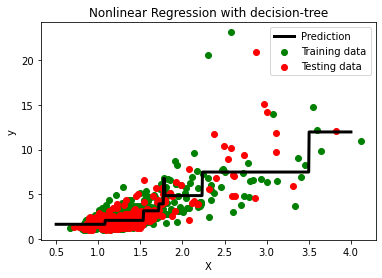

In [295]:
########model: decision tree
from sklearn.tree import DecisionTreeRegressor
## the shape of fitting changes with this max_depth
model_tree = DecisionTreeRegressor(max_depth=3)
model_tree.fit(X_train, y_train)
##########################
X_new = np.linspace(0.5, 4, 692).reshape(-1, 1)
y_pred_new = model_tree.predict(X_new)
##############################
y_pred_test = model_tree.predict(X_test)
y_pred_train = model_tree.predict(X_train)
y_pred_orginal = model_tree.predict(X)

########
# Print the predicted output, R-squared
print('r2_score_test:',r2_score(y_test, y_pred_test))
print('r2_score_train:',r2_score(y_train, y_pred_train))
print('r2_score_orginal:',r2_score(y, y_pred_orginal))

####plots
plt.scatter(X_train, y_train, color='green', label='Training data')
plt.scatter(X_test, y_test, color='red', label='Testing data')
plt.plot(X_new, y_pred_new, color='black', linewidth=3, label='Prediction')
plt.xlabel('X')
plt.ylabel('y')
plt.title('Nonlinear Regression with decision-tree')
plt.legend()
plt.show()


<ipython-input-296-78053869c345>:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model_random.fit(X_train, y_train)


r2_score_test: 0.5318808842374556
r2_score_train: 0.7834369035149201
r2_score_orginal: 0.688481305796875


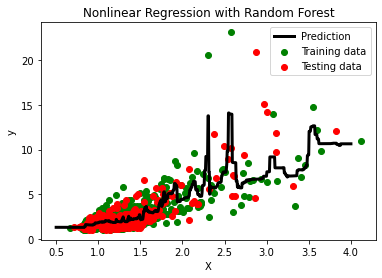

In [296]:
########model: Random forest
from sklearn.ensemble import RandomForestRegressor
model_random = RandomForestRegressor(n_estimators=692, max_depth=5)
model_random.fit(X_train, y_train)
########################
X_new = np.linspace(0.5, 4, 692).reshape(-1, 1)
y_pred_new = model_random.predict(X_new)
##############################
y_pred_test = model_random.predict(X_test)
y_pred_train = model_random.predict(X_train)
y_pred_orginal = model_random.predict(X)

########
# Print the predicted output, R-squared
print('r2_score_test:',r2_score(y_test, y_pred_test))
print('r2_score_train:',r2_score(y_train, y_pred_train))
print('r2_score_orginal:',r2_score(y, y_pred_orginal))

####plots
plt.scatter(X_train, y_train, color='green', label='Training data')
plt.scatter(X_test, y_test, color='red', label='Testing data')
plt.plot(X_new, y_pred_new, color='black', linewidth=3, label='Prediction')
plt.xlabel('X')
plt.ylabel('y')
plt.title('Nonlinear Regression with Random Forest')
plt.legend()
plt.show()


/Users/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


r2_score_test: 0.5936860250103088
r2_score_train: 0.5677285714202208
r2_score_orginal: 0.5779814652663983


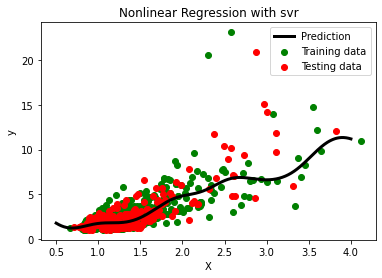

In [297]:
########model: SVR
from sklearn.svm import SVR
##PLAY WITH  c and epsilon
model_svr = SVR(kernel='rbf', C=20, epsilon=0.3)
model_svr.fit(X_train, y_train)
########################
X_new = np.linspace(0.5, 4, 692).reshape(-1, 1)
y_pred_new = model_svr.predict(X_new)

y_pred_test = model_svr.predict(X_test)
y_pred_train = model_svr.predict(X_train)
y_pred_orginal = model_svr.predict(X)
########
# Print the predicted output, R-squared
print('r2_score_test:',r2_score(y_test, y_pred_test))
print('r2_score_train:',r2_score(y_train, y_pred_train))
print('r2_score_orginal:',r2_score(y, y_pred_orginal))

####plots
plt.scatter(X_train, y_train, color='green', label='Training data')
plt.scatter(X_test, y_test, color='red', label='Testing data')
plt.plot(X_new, y_pred_new, color='black', linewidth=3, label='Prediction')
plt.xlabel('X')
plt.ylabel('y')
plt.title('Nonlinear Regression with svr')
plt.legend()
plt.show()


r2_score_test: 0.6324868878337937
r2_score_train: 0.573379784239268
r2_score_orginal: 0.5961686640010643


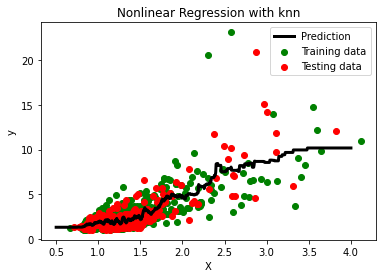

In [298]:
########model: KNN
from sklearn.neighbors import KNeighborsRegressor
##PLAY WITH  n_neighbors
model_knn = KNeighborsRegressor(n_neighbors=20)
model_knn.fit(X_train, y_train)
########################
X_new = np.linspace(0.5, 4, 692).reshape(-1, 1)
y_pred_new = knn.predict(X_new)

y_pred_test = model_knn.predict(X_test)
y_pred_train = model_knn.predict(X_train)
y_pred_orginal = model_knn.predict(X)
########
# Print the predicted output, R-squared
print('r2_score_test:',r2_score(y_test, y_pred_test))
print('r2_score_train:',r2_score(y_train, y_pred_train))
print('r2_score_orginal:',r2_score(y, y_pred_orginal))

####plots
plt.scatter(X_train, y_train, color='green', label='Training data')
plt.scatter(X_test, y_test, color='red', label='Testing data')
plt.plot(X_new, y_pred_new, color='black', linewidth=3, label='Prediction')
plt.xlabel('X')
plt.ylabel('y')
plt.title('Nonlinear Regression with knn')
plt.legend()
plt.show()


/Users/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


r2_score_test: 0.20123078391652682
r2_score_train: 0.85935356564122
r2_score_orginal: 0.6105040407477482


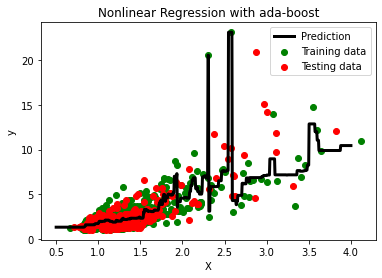

In [299]:
##model: ada_boost
from sklearn.ensemble import AdaBoostRegressor
base_estimator = DecisionTreeRegressor(max_depth=5)
model_ada_boost = AdaBoostRegressor(base_estimator=base_estimator, n_estimators=50, learning_rate=0.1)
model_ada_boost.fit(X_train, y_train)
########################
X_new = np.linspace(0.5, 4, 692).reshape(-1, 1)
y_pred_new = model_ada_boost.predict(X_new)

y_pred_test = model_ada_boost.predict(X_test)
y_pred_train = model_ada_boost.predict(X_train)
y_pred_orginal = model_ada_boost.predict(X)
########
# Print the predicted output, R-squared
print('r2_score_test:',r2_score(y_test, y_pred_test))
print('r2_score_train:',r2_score(y_train, y_pred_train))
print('r2_score_orginal:',r2_score(y, y_pred_orginal))

####plots
plt.scatter(X_train, y_train, color='green', label='Training data')
plt.scatter(X_test, y_test, color='red', label='Testing data')
plt.plot(X_new, y_pred_new, color='black', linewidth=3, label='Prediction')
plt.xlabel('X')
plt.ylabel('y')
plt.title('Nonlinear Regression with ada-boost')
plt.legend()
plt.show()

r2_score_test: 0.28023899182141265
r2_score_train: 0.8936658503459132
r2_score_orginal: 0.6616919948568706


/Users/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


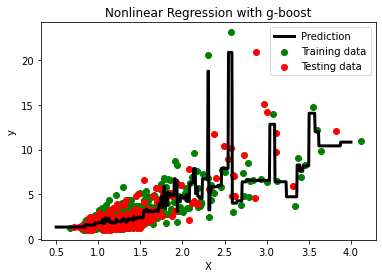

In [300]:
# model : GradientBoos
from sklearn.ensemble import GradientBoostingRegressor
model_g_boost = GradientBoostingRegressor()
model_g_boost.fit(X_train, y_train)
########################
X_new = np.linspace(0.5, 4, 692).reshape(-1, 1)
y_pred_new = model_g_boost.predict(X_new)

y_pred_test = model_g_boost.predict(X_test)
y_pred_train = model_g_boost.predict(X_train)
y_pred_orginal = model_g_boost.predict(X)
########
# Print the predicted output, R-squared
print('r2_score_test:',r2_score(y_test, y_pred_test))
print('r2_score_train:',r2_score(y_train, y_pred_train))
print('r2_score_orginal:',r2_score(y, y_pred_orginal))

####plots
plt.scatter(X_train, y_train, color='green', label='Training data')
plt.scatter(X_test, y_test, color='red', label='Testing data')
plt.plot(X_new, y_pred_new, color='black', linewidth=3, label='Prediction')
plt.xlabel('X')
plt.ylabel('y')
plt.title('Nonlinear Regression with g-boost')
plt.legend()
plt.show()

r2_score_test: 0.2896668551674425
r2_score_train: 0.9995395981792005
r2_score_orginal: 0.7309711087063522


<ipython-input-301-03b6e72d7d1d>:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model_extratree.fit(X_train, y_train)


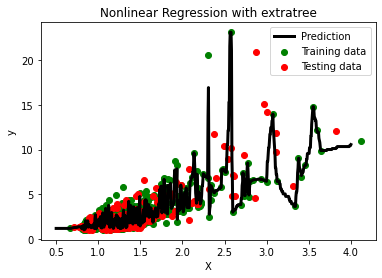

In [301]:
##model ExtraTrees
from sklearn.ensemble import ExtraTreesRegressor
model_extratree = ExtraTreesRegressor(n_estimators=10, random_state=42)
model_extratree.fit(X_train, y_train)
########################
X_new = np.linspace(0.5, 4, 692).reshape(-1, 1)
y_pred_new = model_extratree.predict(X_new)

y_pred_test = model_extratree.predict(X_test)
y_pred_train = model_extratree.predict(X_train)
y_pred_orginal = model_extratree.predict(X)
########
# Print the predicted output, R-squared
print('r2_score_test:',r2_score(y_test, y_pred_test))
print('r2_score_train:',r2_score(y_train, y_pred_train))
print('r2_score_orginal:',r2_score(y, y_pred_orginal))

####plots
plt.scatter(X_train, y_train, color='green', label='Training data')
plt.scatter(X_test, y_test, color='red', label='Testing data')
plt.plot(X_new, y_pred_new, color='black', linewidth=3, label='Prediction')
plt.xlabel('X')
plt.ylabel('y')
plt.title('Nonlinear Regression with extratree')
plt.legend()
plt.show()

r2_score_test: 0.6314784215124377
r2_score_train: 0.5762856045109264
r2_score_orginal: 0.5975906707462677


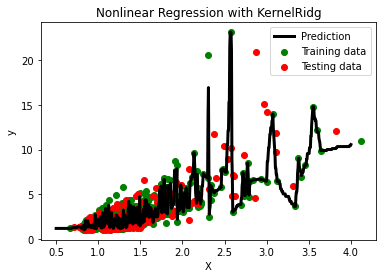

In [302]:
## model KernelRidge
from sklearn.kernel_ridge import KernelRidge
# Fit the Kernel Ridge Regression model
model_KernelRidg = KernelRidge(alpha=0.1, kernel='rbf')
model_KernelRidg.fit(X_train, y_train)
########################
X_new = np.linspace(0.5, 4, 692).reshape(-1, 1)
y_pred_new = model_extratree.predict(X_new)

y_pred_test = model_KernelRidg.predict(X_test)
y_pred_train = model_KernelRidg.predict(X_train)
y_pred_orginal = model_KernelRidg.predict(X)
########
# Print the predicted output, R-squared
print('r2_score_test:',r2_score(y_test, y_pred_test))
print('r2_score_train:',r2_score(y_train, y_pred_train))
print('r2_score_orginal:',r2_score(y, y_pred_orginal))

####plots
plt.scatter(X_train, y_train, color='green', label='Training data')
plt.scatter(X_test, y_test, color='red', label='Testing data')
plt.plot(X_new, y_pred_new, color='black', linewidth=3, label='Prediction')
plt.xlabel('X')
plt.ylabel('y')
plt.title('Nonlinear Regression with KernelRidg')
plt.legend()
plt.show()

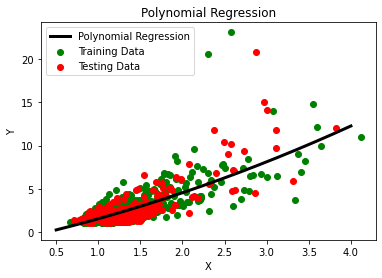

r2_score_train: 0.5454831287885435
r2_score_test: 0.6361940663472756


In [303]:
##model: Polynomial
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
# Create polynomial features
degree = 2  # Degree of polynomial
model_poly = PolynomialFeatures(degree=degree)
X_train_poly = model_poly.fit_transform(X_train)
X_test_poly = model_poly.transform(X_test)
# Create and fit the polynomial regression model
model = LinearRegression()
model.fit(X_train_poly, y_train)

# Predict using the trained model
X_plot = np.linspace(0.5, 4, 692).reshape(-1, 1)
X_plot_poly = model_poly.transform(X_plot)
y_plot = model.predict(X_plot_poly)

# Plot the original data and the regression curve
plt.scatter(X_train, y_train, color='green', label='Training Data')
plt.scatter(X_test, y_test, color='red', label='Testing Data')
plt.plot(X_plot, y_plot, color='black', label='Polynomial Regression', linewidth=3)
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Polynomial Regression')
plt.legend()
plt.show()
# Evaluate the model accuracy
y_train_pred = model.predict(X_train_poly)
y_test_pred = model.predict(X_test_poly)
print("r2_score_train:", r2_score(y_train, y_train_pred))
print("r2_score_test:", r2_score(y_test, y_test_pred))

/Users/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


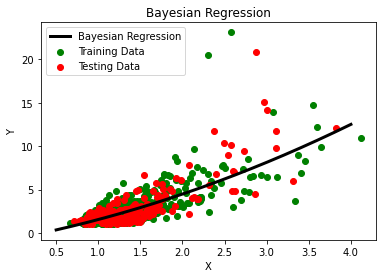

r2_score_train: 0.5452187009957163
r2_score_test: 0.6373403431551519


In [304]:
##model BayesianRidge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import BayesianRidge
degree = 2  # Degree of polynomial
model_poly = PolynomialFeatures(degree=degree)
X_train_poly = model_poly.fit_transform(X_train)
X_test_poly = model_poly.transform(X_test)
# Create and fit the Bayesian model
model_bayes = BayesianRidge()
model_bayes.fit(X_train_poly, y_train)

# Predict using the trained model
X_plot = np.linspace(0.5, 4, 692).reshape(-1, 1)
X_plot_poly = model_poly.transform(X_plot)
y_plot = model_bayes.predict(X_plot_poly)

# Plot the original data and the regression curve
plt.scatter(X_train, y_train, color='green', label='Training Data')
plt.scatter(X_test, y_test, color='red', label='Testing Data')
plt.plot(X_plot, y_plot, color='black', label='Bayesian Regression', linewidth=3)
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Bayesian Regression')
plt.legend()
plt.show()
# Evaluate the model accuracy
y_train_pred = model_bayes.predict(X_train_poly)
y_test_pred = model_bayes.predict(X_test_poly)
print("r2_score_train:", r2_score(y_train, y_train_pred))
print("r2_score_test:", r2_score(y_test, y_test_pred))

22/22 [==============================] - 0s 963us/step
r2_score_test: 0.6423428557689354
r2_score_train: 0.5556926904554241
r2_score_orginal: 0.5889197319546502


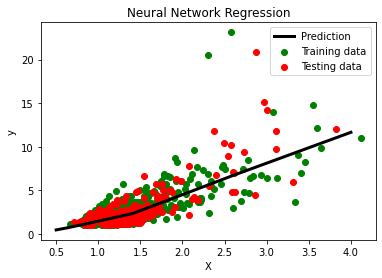

In [305]:
##model deep learning
from tensorflow import keras
from sklearn.preprocessing import MinMaxScaler

# Normalize the input features
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
X_scaled = scaler.transform(X)


# Build the neural network model
model = keras.Sequential([
    keras.layers.Dense(64, activation='relu', input_shape=(1,)),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dense(1)
])

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')
# Train the model
model.fit(X_train_scaled, y_train, epochs=100, batch_size=8, verbose=0)
#____________
X_new = np.linspace(0.5, 4, 692).reshape(-1, 1)
X_new_scaled = scaler.transform(X_new)
y_pred_new = model.predict(X_new_scaled)

y_pred_test = model.predict(X_test_scaled)
y_pred_train = model.predict(X_train_scaled)
y_pred_orginal = model.predict(X_scaled)

########
# Print the predicted output, R-squared
print('r2_score_test:',r2_score(y_test, y_pred_test))
print('r2_score_train:',r2_score(y_train, y_pred_train))
print('r2_score_orginal:',r2_score(y, y_pred_orginal))

####plots
plt.scatter(X_train, y_train, color='green', label='Training data')
plt.scatter(X_test, y_test, color='red', label='Testing data')
plt.plot(X_new, y_pred_new, color='black', linewidth=3, label='Prediction')
plt.xlabel('X')
plt.ylabel('y')
plt.title('Neural Network Regression')
plt.legend()
plt.show()